In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

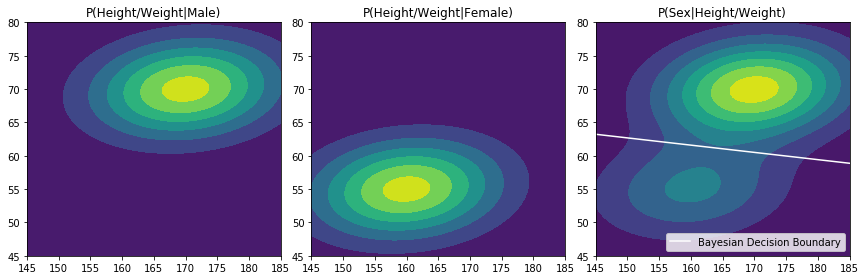

In [12]:
male=0.7 ; female=0.3

mu_male=np.array([170,70]) ; mu_female=np.array([160,55])
sigma=np.array([[10**2,0.5*5*2.5],[0.5*5*2.5,5**2]])
hw_male=multivariate_normal(mu_male,sigma)
hw_female=multivariate_normal(mu_female,sigma)

ht=np.linspace(145,185,500) ; wt=np.linspace(45,80,500)
h,w=np.meshgrid(ht,wt);pos=np.dstack((h,w))
hw_sex=hw_male.pdf(pos)*male+hw_female.pdf(pos)*female

### Visualize p(C,x) = p(C)p(x|C)
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
ax1.contourf(h, w, hw_male.pdf(pos))
ax1.set(title='P(Height/Weight|Male)')

ax2 = fig.add_subplot(132)
ax2.contourf(h, w, hw_female.pdf(pos))
ax2.set(title='P(Height/Weight|Female)')

ax3 = fig.add_subplot(133)
ax3.contourf(h, w, hw_sex)
ax3.set(title='P(Sex|Height/Weight)')

# plot Bayesian Decision Boundary
inv = np.linalg.inv
m1 = np.matrix(mu_male).T; m2 = np.matrix(mu_female).T
w = inv(sigma) @ (m1 - m2)
w0 = -0.5 * m1.T @ inv(sigma) @ m1 + 0.5 * m2.T @ inv(sigma) @ m2 + np.log(male/female)
# @는 행렬의 곱을 의미한다.
bdb = -w0/w[1] - w[0]/w[1] * ht
ax3.plot(ht, bdb.T, label='Bayesian Decision Boundary', color='white')
ax3.legend(loc='lower right')

fig.tight_layout()

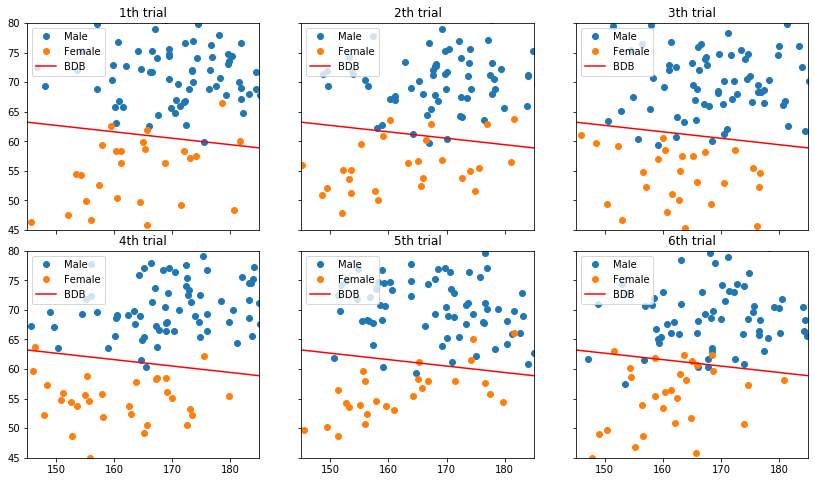

In [14]:
N = 10000

fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(14,8))
fig.subplots_adjust(hspace=0.1, wspace=0.18)
for i, axi in enumerate(axes.flat, 1):
    
    
    N_male = int(100 * male); N_female = int(100 * female)
    male_data = hw_male.rvs(N_male)
    female_data = hw_female.rvs(N_female)
    
   
    axi.set(xlim=(145, 185), ylim=(45, 80), title='{0}th trial'.format(i))
    axi.plot(male_data[:,0], male_data[:,1], linestyle='', marker='o', label='Male')
    axi.plot(female_data[:,0], female_data[:,1], linestyle='', marker='o', label='Female')
    axi.plot(ht, bdb.T, label='BDB', color='red')
    axi.legend(loc='upper left')

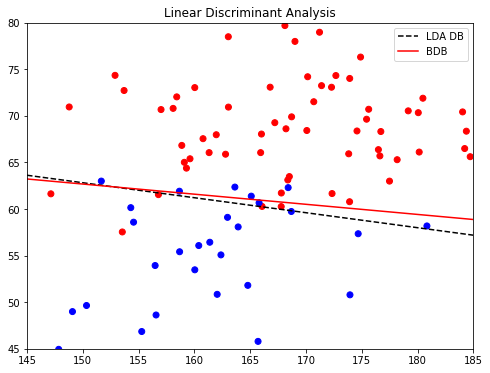

In [15]:

X = np.vstack((male_data, female_data))
y = np.hstack((np.repeat(1, male_data.shape[0]), np.repeat(0, female_data.shape[0])))


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf = LDA().fit(X,y)
w = clf.coef_; w0 = clf.intercept_
db = -w0/w[:,1] - w[:,0]/w[:,1] * ht

fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlim=(145, 185), ylim=(45, 80), title='Linear Discriminant Analysis')
colors=np.array(['blue','red'])
ax.scatter(X[:,0], X[:,1], color=colors[y])
ax.plot(ht, db.T, label='LDA DB', color='black', linestyle='--')
ax.plot(ht, bdb.T, label='BDB', color='red')
ax.legend()

QDA train Error:  0.91
LDA train Error:  0.89


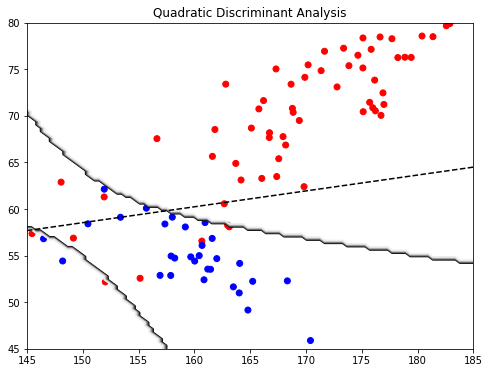

In [20]:
sigma1 = np.array([[10**2, 0.8*10*8],[0.8*10*8, 8**2]])
sigma2 = np.array([[6**2, -0.7*6*4],[-0.7*6*4, 4**2]])
HW_male = multivariate_normal(mu_male, sigma1)
HW_female = multivariate_normal(mu_female, sigma2)
male_data = HW_male.rvs(N_male)
female_data = HW_female.rvs(N_female)

X = np.vstack((male_data, female_data))
y = np.hstack((np.repeat(1, male_data.shape[0]), np.repeat(0, female_data.shape[0])))


from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
clf = QDA().fit(X,y)
print('QDA train Error: ', clf.score(X,y))

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set(xlim=(145, 185), ylim=(45, 80), title='Quadratic Discriminant Analysis')
colors=np.array(['blue','red'])
ax1.scatter(X[:,0], X[:,1], color=colors[y])

## Plot LDA Decision Boundary
clf_lda = LDA().fit(X,y)
w = clf_lda.coef_; w0 = clf_lda.intercept_
db = -w0/w[:,1] - w[:,0]/w[:,1] * ht
ax1.plot(ht, db.T, color='black', linestyle='--')
print('LDA train Error: ', clf_lda.score(X,y))

## Plot QDA Decision Boundary
r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
Z = clf.predict(R).reshape(R1.shape)
ax1.contour(R1, R2, Z, cmap="Greys_r")

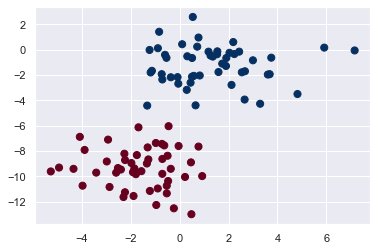

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

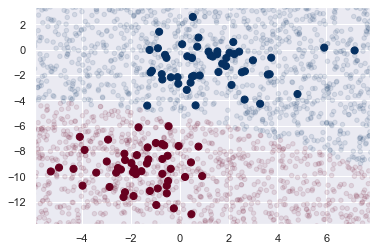

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [23]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[5])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]
predict_category('sending a payload to the ISS')

In [ ]:
predict_category('discussing islam vs atheism')

In [ ]:
predict_category('determining the screen resolution')

[Text(0.5, 0, 'Iteration'), Text(0.5, 1.0, 'Cross Entropy Loss')]

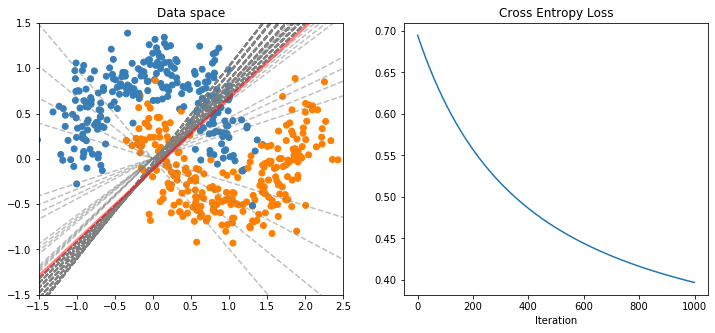

In [4]:
import sklearn.datasets
import numpy as np
X, Y = sklearn.datasets.make_moons(n_samples=500, noise=0.2)
colors = np.array(['#377eb8', '#ff7f00'])
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax1.scatter(X[:,0], X[:, 1], color=colors[Y])
ax1.set(xlim=(-1.5, 2.5), ylim=(-1.5, 1.5), title='Data space')

X, Y = X.T, Y.reshape(1, Y.shape[0]) 

epochs = 1000
eta = 0.01

def sigmoid(z): 
    return 1/(1+np.exp(-z))

m = X.shape[1]
w = np.random.randn(X.shape[0], 1)*0.01
b = 0


losstrack=[]
for epoch in range(epochs):
    # log-odd
    z = np.dot(w.T, X) + b
    
    # prediction by z
    p = sigmoid(z) 
    
    # cross entropy error averaged
    cost = -np.sum(np.multiply(np.log(p), Y) + np.multiply((1-Y), np.log(1-p)))/m 
    losstrack.append(np.squeeze(cost))
    
    dz = p-Y
    dw = (1/m) * np.dot(X, dz.T)
    db = (1/m) * np.sum(dz)
    w = w - eta * dw
    b = b - eta * db
   
    if epoch & 100 == 0:
        db = -b/w[1] - w[0]/w[1] * np.linspace(-3, 3, 100)
        ax1.plot(np.linspace(-3, 3, 100), db.T, label='Decision Boundary', 
                 linestyle='--',color='grey', alpha=0.5)
        
db = -b/w[1] - w[0]/w[1] * np.linspace(-3, 3, 100)
ax1.plot(np.linspace(-3, 3, 100), db.T, label='Decision Boundary', 
         linewidth=3, color='red', alpha=0.5)

ax2 = fig.add_subplot(122)
ax2.plot(losstrack)
ax2.set(title='Cross Entropy Loss', xlabel='Iteration')

0.88


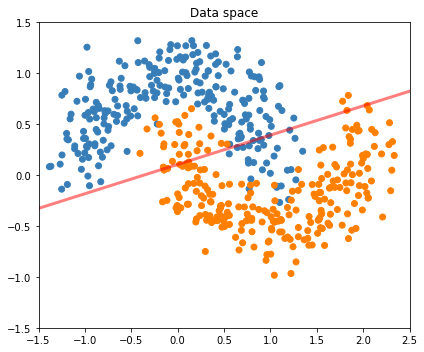

In [5]:
from sklearn.linear_model import LogisticRegression
X, Y = sklearn.datasets.make_moons(n_samples=500, noise=0.2)
clf = LogisticRegression(solver='sag', max_iter=100).fit(X, Y)
clf.predict(X[:100,:]) 
clf.predict_proba(X[:100,:])
print(clf.score(X, Y)) 

fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.scatter(X[:,0], X[:, 1], color=colors[Y])
ax1.set(xlim=(-1.5, 2.5), ylim=(-1.5, 1.5), title='Data space')
w = clf.coef_; b = clf.intercept_
db = -b/w[:,1] - w[:,0]/w[:,1] * np.linspace(-3, 3, 100)
ax1.plot(np.linspace(-3, 3, 100), db.T, label='Decision Boundary', 
         linewidth=3, color='red', alpha=0.5)
fig.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.952


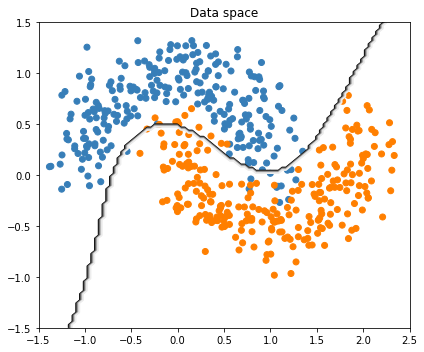

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False) # No column of 1s
X_poly = poly.fit_transform(X)
clf = LogisticRegression().fit(X_poly, Y)
print(clf.score(X_poly, Y)) # return 1- Error rate in Training set

fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.scatter(X[:,0], X[:, 1], color=colors[Y])
ax1.set(xlim=(-1.5, 2.5), ylim=(-1.5, 1.5), title='Data space')

r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
R_poly = poly.fit_transform(R)
Z = clf.predict(R_poly).reshape(R1.shape)
plt.contour(R1, R2, Z, cmap="Greys_r")

fig.tight_layout()

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [46]:
df_wine=pd.read_csv('Wine.csv',header=None)
df_wine.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [60]:
df_wine.columns = [  'class'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]
df_wine.head()

,class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
df.isnull().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

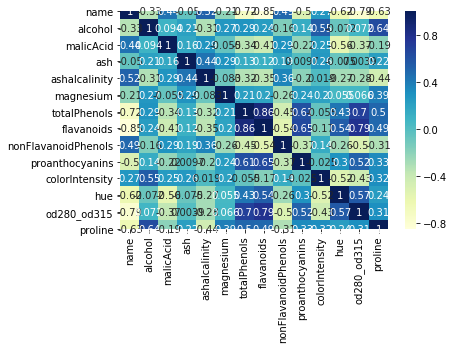

In [37]:
import seaborn as sns
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

In [48]:
from sklearn.model_selection import train_test_split;
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values;
#print(np.unique(y))
#split with stratify on y for equal proportion of classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y,random_state = 0);

#standardize the features with same model on train and test sets
from sklearn.preprocessing import StandardScaler;
sc = StandardScaler();
X_train_std = sc.fit_transform(X_train);
X_test_sd = sc.transform(X_test);

In [49]:
#set precision of the vectors
np.set_printoptions(precision = 4);
mean_vecs = [];

#for each of the label compute the mean vector 
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train == label],axis = 0));
    print('Mean Vector %s: %s\n' %(label, mean_vecs[label - 1]));

Mean Vector 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

Mean Vector 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

Mean Vector 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [50]:
#define number of features
d  = 13;
#define the within class scatter matrix of dimension d x d
S_W = np.zeros((d,d));

# run through each class label and keep track of the corresponding mean vector
for label , mv in zip(range(1,4),mean_vecs):
    #define class scatter matrix for each label of dimension d x d 
    class_scatter = np.zeros((d,d));
    
    #run through each row corresponding to a class label and compute the class scatter matrix
    for row in X_train_std[y_train == label]:
        #reshape to vectors of dimension d x 1
        row, mv  = row.reshape(d,1), mv.reshape(d,1);
        #sum for each row d x d dimensional class matrices
        class_scatter += (row - mv).dot((row - mv).T);
    S_W += class_scatter;
# within class scatter matrix of dimension d x d
print("Within Class Scatter Matrix: %s x %s" % (S_W.shape[0], S_W.shape[1]));

Within Class Scatter Matrix: 13 x 13


In [51]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [52]:
S_W = np.zeros((d,d));
for label, mv in zip(range(1,4),mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T);
    S_W += class_scatter;
print('Scaled Within Class Scatter Matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]));

Scaled Within Class Scatter Matrix: 13x13


In [53]:
#calculate the overall mean vector
mean_overall = np.mean(X_train_std,axis = 0);
#define Between Class Scatter Matrix of dimension d x d
S_B = np.zeros((d,d));
for i, mean_vec in enumerate(mean_vecs):
    #find number of samples for each class
    n = X_train[y_train == i + 1].shape[0];
    mean_vec = mean_vec.reshape(d,1);
    mean_overall = mean_overall.reshape(d,1);
    #find the scatter matrix using the above equation
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T);
print('Between Class Scatter Matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]));

Between Class Scatter Matrix: 13x13


In [54]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B));
eigen_pairs  = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))];
eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True);
print('Eigenvalues in descending order: \n');
for eigen_val in eigen_pairs:
    print(eigen_val[0]);

Eigenvalues in descending order: 

349.6178089059939
172.76152218979388
3.7853134512521556e-14
2.117398448224407e-14
1.5164618894178885e-14
1.5164618894178885e-14
1.3579567140455979e-14
1.3579567140455979e-14
7.587760371654683e-15
5.906039984472233e-15
5.906039984472233e-15
2.256441978569674e-15
0.0


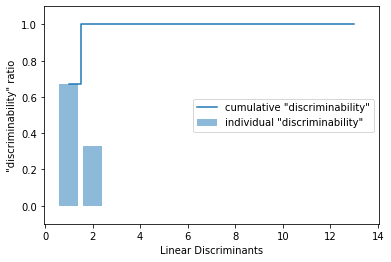

In [55]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real,reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center',label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [56]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


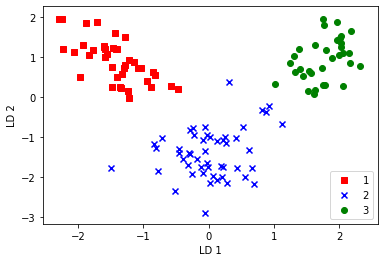

In [57]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers): plt.scatter(X_train_lda[y_train==l, 0],X_train_lda[y_train==l, 1] * (-1),c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()

In [81]:
wine=pd.read_csv('Wine.csv',header=None)
wine.columns = [  'class'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]
wine.drop(wine.columns[[1,2,3,4,5,6,8,9,10,11,13]], axis='columns', inplace=True)
wine = wine[wine.flavanoids < 4.5]

In [85]:
X = wine[['flavanoids', 'od280_od315']]
Y = wine[['class']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(123, 2)
(54, 2)
(123, 1)
(54, 1)


In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error as mse
lda = LinearDiscriminantAnalysis().fit(X_train, Y_train.values.ravel())

In [89]:
wine.groupby('class').size()

class
1    59
2    70
3    48
dtype: int64

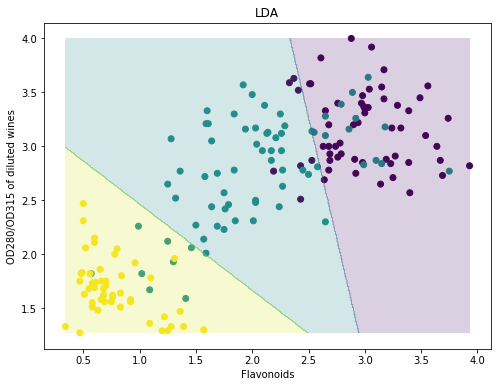

In [102]:
plt.figure(figsize=(8, 6))
plt.scatter(data = wine, x = 'flavanoids', y = 'od280_od315', c = 'class', cmap='viridis')
plt.title('LDA')
plt.xlabel('Flavonoids')
plt.ylabel('OD280/OD315 of diluted wines')

grid_size = 500
A, B = np.meshgrid(np.linspace(X['flavanoids'].min(), X['flavanoids'].max(), grid_size),
                   np.linspace(X['od280_od315'].min(), X['od280_od315'].max(), grid_size))
C = lda.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.2, cmap='viridis')

In [103]:
lda_train_mse = mse(Y_train, lda.predict(X_train))
lda_test_mse = mse(Y_test, lda.predict(X_test))
print('LDA train mse :', lda_train_mse);
print('LDA test mse :', lda_test_mse);
print('LDA train score:', lda.score(X_train, Y_train));
print('LDA test score:', lda.score(X_test, Y_test))

LDA train mse : 0.17886178861788618
LDA test mse : 0.12962962962962962
LDA train score: 0.8211382113821138
LDA test score: 0.8703703703703703


In [104]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis().fit(X_train, Y_train.values.ravel())

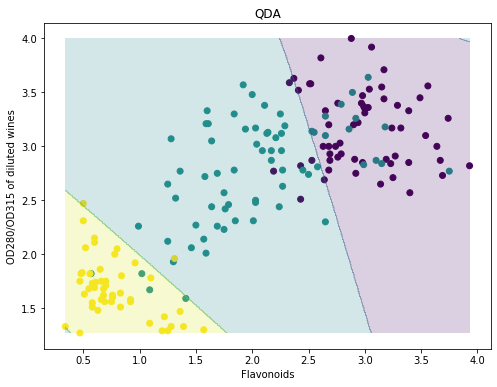

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(data = wine, x = 'flavanoids', y = 'od280_od315', c = 'class', cmap='viridis')
plt.title('QDA')
plt.xlabel('Flavonoids')
plt.ylabel('OD280/OD315 of diluted wines')

grid_size = 500
A, B = np.meshgrid(np.linspace(X['flavanoids'].min(), X['flavanoids'].max(), grid_size),
                   np.linspace(X['od280_od315'].min(), X['od280_od315'].max(), grid_size))
C = qda.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.2, cmap='viridis')

In [106]:
qda_train_mse = mse(Y_train, qda.predict(X_train))
qda_test_mse = mse(Y_test, qda.predict(X_test))
print('QDA train mse :', qda_train_mse);
print('QDA test mse :', qda_test_mse);
print('QDA train score:', qda.score(X_train, Y_train));
print('QDA test score:', qda.score(X_test, Y_test))

QDA train mse : 0.14634146341463414
QDA test mse : 0.14814814814814814
QDA train score: 0.8536585365853658
QDA test score: 0.8518518518518519


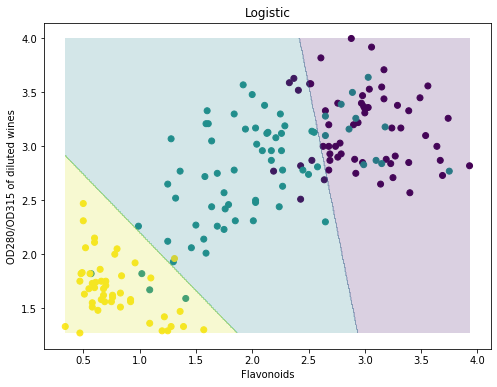

In [108]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='sag', max_iter=10000, multi_class='auto').fit(X_train, Y_train.values.ravel())

plt.figure(figsize=(8, 6))
plt.scatter(data = wine, x = 'flavanoids', y = 'od280_od315', c = 'class', cmap='viridis')
plt.title('Logistic')
plt.xlabel('Flavonoids')
plt.ylabel('OD280/OD315 of diluted wines')

grid_size = 500
A, B = np.meshgrid(np.linspace(X['flavanoids'].min(), X['flavanoids'].max(), grid_size),
                   np.linspace(X['od280_od315'].min(), X['od280_od315'].max(), grid_size))
C = logistic.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.2, cmap='viridis')

In [112]:
logistic_train_mse = mse(Y_train, logistic.predict(X_train))
logistic_test_mse = mse(Y_test, logistic.predict(X_test))
print('Logistic train mse:', logistic_train_mse); 
print('Logistic test mse:', logistic_test_mse);
print('Logistic train score:', logistic.score(X_train, Y_train));
print('Logistic test score:', logistic.score(X_test, Y_test))

Logistic train mse: 0.14634146341463414
Logistic test mse: 0.12962962962962962
Logistic train score: 0.8536585365853658
Logistic test score: 0.8703703703703703


In [113]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
log = LogisticRegression(solver = 'sag', max_iter= 10000, multi_class= "auto")

for i in range(1,7):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    logistic2 = log.fit(X_train_poly, Y_train.values.ravel())
    print('차수', i, ':', logistic2.score(X_train_poly, Y_train.values.ravel()), logistic2.score(X_test_poly, Y_test.values.ravel()))

차수 1 : 0.8536585365853658 0.8703703703703703
차수 2 : 0.8455284552845529 0.8703703703703703
차수 3 : 0.8617886178861789 0.8518518518518519
차수 4 : 0.8699186991869918 0.8518518518518519
차수 5 : 0.8699186991869918 0.8148148148148148
차수 6 : 0.8617886178861789 0.7962962962962963


In [115]:
print('LDA test MSE:', lda_test_mse)
print('QDA test MSE:', qda_test_mse)
print('Logistic test mse:', logistic_test_mse)

LDA test MSE: 0.12962962962962962
QDA test MSE: 0.14814814814814814
Logistic test mse: 0.12962962962962962


In [116]:
print('LDA train MSE:', lda_train_mse)
print('QDA train MSE:', qda_train_mse)
print('Logistic train mse:', logistic_train_mse)

LDA train MSE: 0.17886178861788618
QDA train MSE: 0.14634146341463414
Logistic train mse: 0.14634146341463414


전체적으로 고려해보았을때 로지스틱이 가장 적절하다고 생각한다.